In [81]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [82]:
data = pd.read_csv('Startups_Data.csv')
#data
new_data = data.drop(data.index[[47,48,49]])

In [83]:
X = new_data.iloc[:, :-1]    # independent varible
y = new_data.iloc[:, -1]     # dependent variable

X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [84]:
# Since we do not need all the 3 columns and can work with only 2 columns for classifying the states, we will drop one column
states = pd.get_dummies(X['State'], drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [85]:
X = X.drop('State', axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [86]:
X = pd.concat([X, states], axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)g
print (X[:10])

[[ 2.03249353  0.53623226  2.18111054 -0.71842121  1.39194109]
 [ 1.96816382  1.08000052  1.93610993 -0.71842121 -0.71842121]
 [ 1.75409329 -0.80639348  1.6201329   1.39194109 -0.71842121]
 [ 1.54205891 -0.1482178   1.40281367 -0.71842121  1.39194109]
 [ 1.48910186 -1.17268304  1.25317877  1.39194109 -0.71842121]
 [ 1.2499155  -0.85637131  1.22412318 -0.71842121  1.39194109]
 [ 1.31394268  0.92307453 -0.84183983 -0.71842121 -0.71842121]
 [ 1.21300407  0.86040471  0.88160659  1.39194109 -0.71842121]
 [ 0.98491917  0.98015901  0.77386133 -0.71842121  1.39194109]
 [ 1.05020418 -0.52347892  0.71559595 -0.71842121 -0.71842121]]


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [89]:
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]                        
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

In [90]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y)**2)/(2 * m)
    return J

In [91]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
     #print(iteration)
     # Hypothesis Values
         h = X.dot(B)
     # Difference b/w Hypothesis and Actual Y
         loss = h - Y
     # Gradient Calculation
         gradient = X.T.dot(loss) / m
     # Changing Values of B using Gradient
         B = B - alpha * gradient
     # New Cost Value
         cost = cost_function(X, Y, B)
         cost_history[iteration] = cost
 
    return B, cost_history

In [92]:
B = np.zeros(X_train.shape[1])
alpha = 0.05
iter_ = 300
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

Text(0.5, 1.0, 'Error vs. Training Epoch')

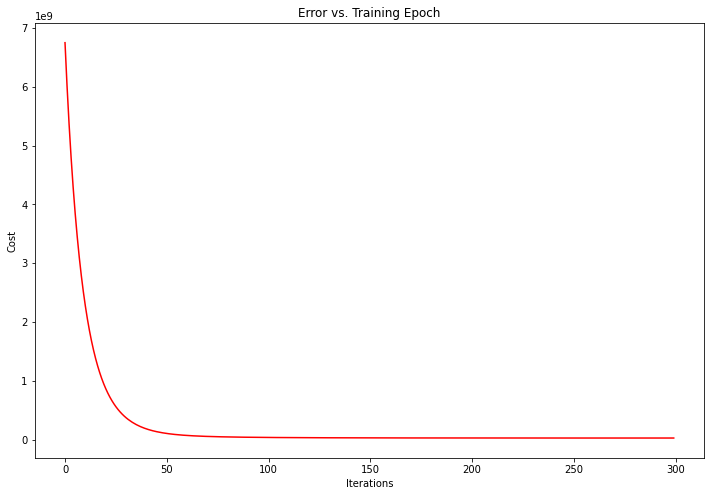

In [93]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iter_), cost_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [94]:
y_pred = X_test.dot(newB)
print (y_pred[:5])
print (y_test[:5])

[102134.63730813  99967.48055113 101458.27705018 170038.11865866
 128964.84232335]
28    103282.38
33     96778.92
30     99937.59
4     166187.94
18    124266.90
Name: Profit, dtype: float64


In [95]:
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print ("MSE :", MSE)
print ("R2 :", score)

MSE : 26508673.501339298
R2 : 0.9643577144617399
